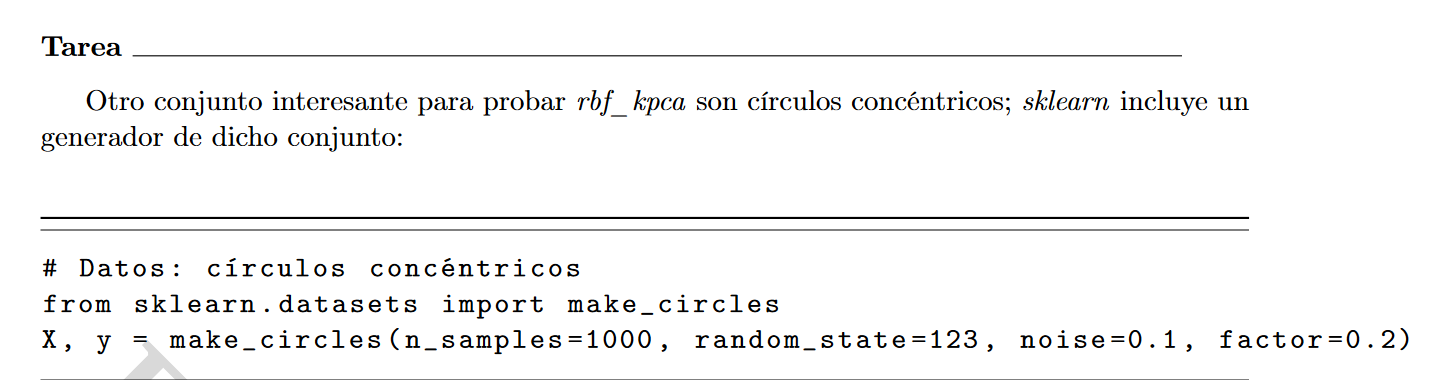

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.linalg import eigh

In [2]:
def rbf_kpca(X,gamma,n_components):
    #obtener las distancias cuadradas de todas las parejas de vectores
    sq_dists=pdist(X,'sqeuclidean') #distancia euclideana cuadratica
    #convertir a una matriz
    mat_sq_dist = squareform(sq_dists)
    #obtener matriz de nucleos
    K = np.exp(-gamma*mat_sq_dist)
    #centrar la matriz
    N=K.shape[0]
    one_n = np.ones((N,N))/N
    K=K-one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)
    #obtener los eigenpares; scipy.linalg.eigh los devuelve ordenados (asc)
    eigenvals,eigenvecs =eigh(K)
    eigenvals,eigenvecs = eigenvals[::-1],eigenvecs[:,::-1] #Invertir los eigenvals
    #seleccionar los k primeros eigenpares
    alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
    lambdas = np.column_stack([eigenvals[i] for i in range(n_components)])
    return alphas,lambdas

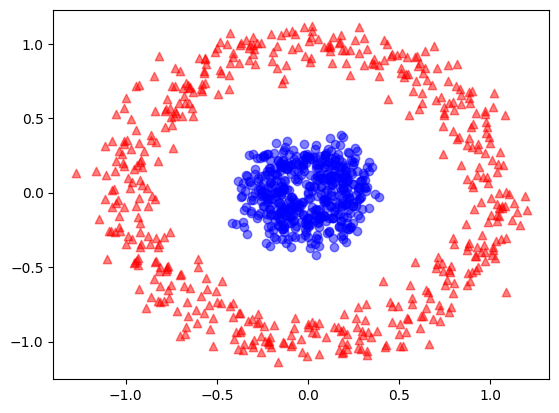

In [3]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000,random_state=123,noise=0.1,factor =0.2)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

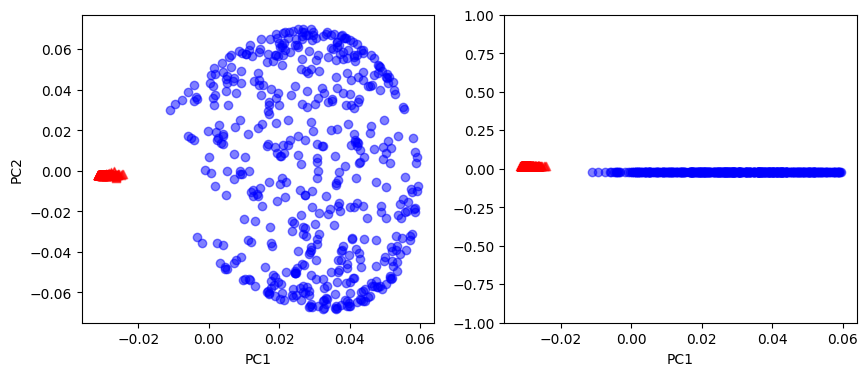

In [6]:
X_kpca,_=rbf_kpca(X,gamma=15,n_components=2)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros(y[y==0].shape[0]) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros(y[y==1].shape[0]) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()

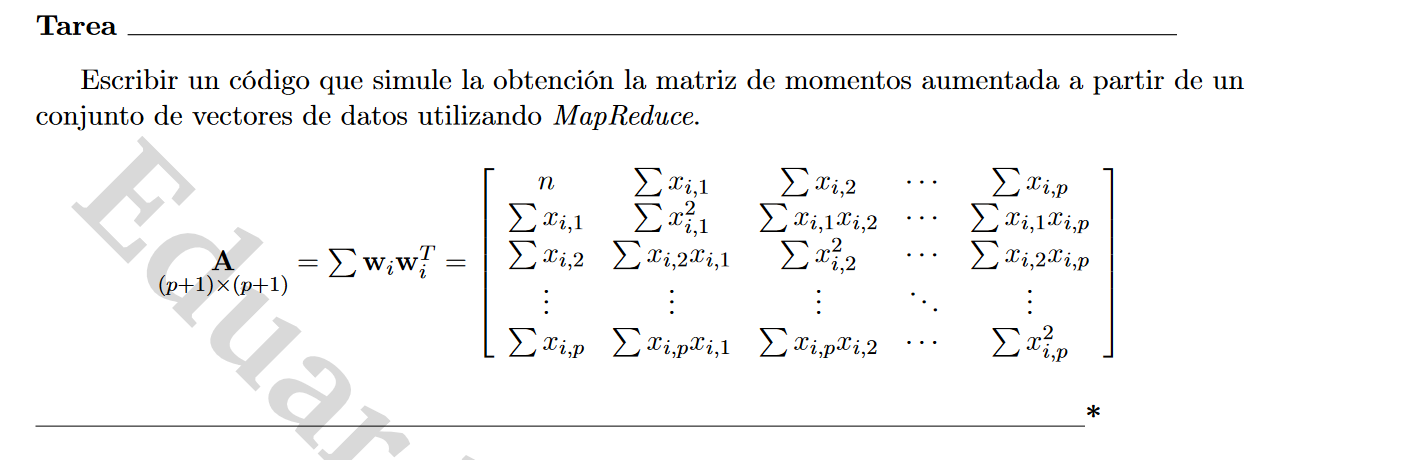

In [7]:
import numpy as np
from functools import reduce

# Ejemplo de datos: 5 vectores de dimensión (p+1)
data = [
    np.array([1, 2, 3]),  # w1
    np.array([4, 5, 6]),  # w2
    np.array([7, 8, 9]),  # w3
    np.array([10, 11, 12]),  # w4
    np.array([13, 14, 15])  # w5
]

# Función Map: Calcula el producto exterior w_i * w_i^T para cada w_i
def map_function(w):
    return np.outer(w, w)

# Aplicamos Map a cada vector
mapped_values = list(map(map_function, data))

# Función Reduce: Suma las matrices obtenidas en el paso anterior
def reduce_function(x, y):
    return x + y

# Usamos Reduce para obtener la matriz de momentos aumentada
A = reduce(reduce_function, mapped_values)

print("Matriz de momentos aumentada A:")
print(A)


Matriz de momentos aumentada A:
[[335 370 405]
 [370 410 450]
 [405 450 495]]
